# 17.2 Index Numbers

Типи індексів :

1.Single-Item Price Index (Індекс цін для одного товару)

Розраховується як відсоток від ціни в базовому періоді

Formula:

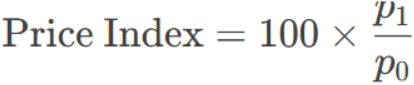

де p0 — ціна в базовому періоді (base period price), a p1​ — ціна в аналізованому періоді (current period price)

2. Unweighted Aggregate Price Index(Незважений агрегований індекс цін)

Середня ціна групи товарів у кожному періоді порівнюється з базовим періодем, має недолік бо не враховує різні обсяги продажі

Formula: 

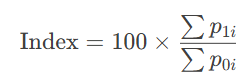

3. Laspeyres Price Index (Зважений індекс Ласпейреса)

Враховує кількості з базового періоду як ваги, його перевагою є стабільність так як він використовує фіксовані ваги, а недоліком зміна сруктури споживання 

Formula: 

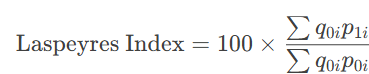

4. Laspeyres Quantity Index (Індекс кількостей Ласпейреса)

Оцінює зміни кількостей з урахуванням цін базового періоду

Formula: 

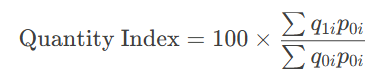


## EXERCISES

### 2

In [1]:
import pandas as pd

# Вхідні дані
data = {
    "WEEK": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "PRICE": [ 35, 35.75, 34.5, 34.5, 35, 34.75, 35, 34.5, 34.5, 35.25, 38, 37.75]
}

# Створення DataFrame
df = pd.DataFrame(data)


In [2]:
# Індекс цін з базою на тиждень 1
base_week_1 = df.loc[df["WEEK"] == 1, "PRICE"].values[0]
df["Price Index (Base Week 1)"] = (df["PRICE"] / base_week_1 * 100).round(2)

In [3]:
# Індекс цін з базою на тиждень 4
base_week_4 = df.loc[df["WEEK"] == 4, "PRICE"].values[0]
df["Price Index (Base Week 4)"] = (df["PRICE"] / base_week_4 * 100).round(2)

 WEEK  PRICE  Price Index (Base Week 1)  Price Index (Base Week 4)
    1  35.00                     100.00                     101.45
    2  35.75                     102.14                     103.62
    3  34.50                      98.57                     100.00
    4  34.50                      98.57                     100.00
    5  35.00                     100.00                     101.45
    6  34.75                      99.29                     100.72
    7  35.00                     100.00                     101.45
    8  34.50                      98.57                     100.00
    9  34.50                      98.57                     100.00
   10  35.25                     100.71                     102.17
   11  38.00                     108.57                     110.14
   12  37.75                     107.86                     109.42


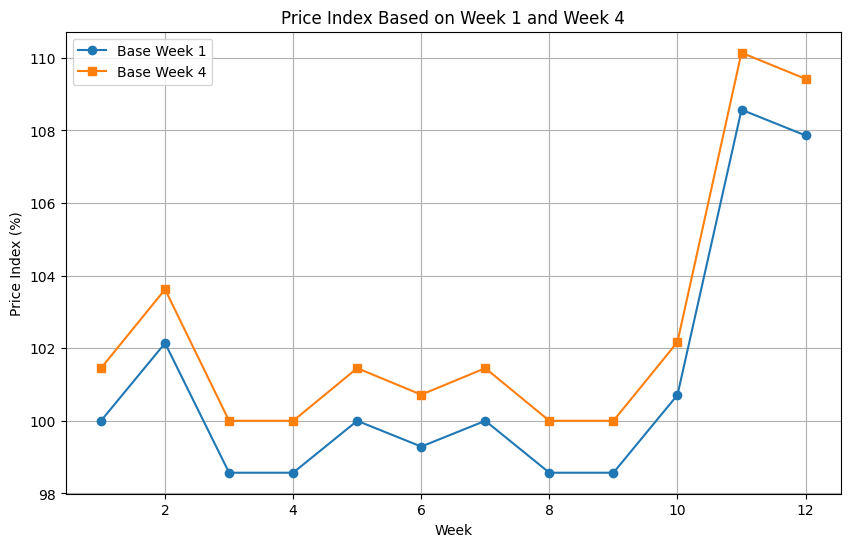

In [4]:
# Вивід результату
print(df[["WEEK", "PRICE", "Price Index (Base Week 1)", "Price Index (Base Week 4)"]].to_string(index=False))

import matplotlib.pyplot as plt

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(df["WEEK"], df["Price Index (Base Week 1)"], marker='o', label="Base Week 1")
plt.plot(df["WEEK"], df["Price Index (Base Week 4)"], marker='s', label="Base Week 4")

# Додавання заголовків і підписів осей
plt.title("Price Index Based on Week 1 and Week 4")
plt.xlabel("Week")
plt.ylabel("Price Index (%)")
plt.legend()

# Показати графік
plt.grid(True)
plt.show()

### 3

In [5]:
import pandas as pd

# Початкові дані у вигляді списків
months = ["January", "February", "March", "April", "May", "June", "July",
          "August", "September", "October", "November", "December"]

steak_prices = [7.12, 7.41, 7.45, 7.70, 7.72, 7.75, 8.10, 8.15, 8.20, 8.30, 8.45, 8.65]
seafood_prices = [6.45, 6.40, 6.25, 6.60, 6.70, 6.85, 6.90, 6.84, 6.96, 7.10, 7.10, 7.14]
chicken_prices = [5.39, 5.21, 5.25, 5.40, 5.45, 5.60, 5.54, 5.70, 5.72, 5.69, 5.85, 6.21]

steak_quantities = [123, 110, 115, 101, 118, 100, 92, 87, 123, 131, 136, 149]
seafood_quantities = [169, 160, 181, 152, 140, 128, 129, 130, 164, 169, 176, 193]
chicken_quantities = [243, 251, 265, 231, 263, 237, 221, 204, 293, 301, 327, 351]

# Створення DataFrame
df = pd.DataFrame({
    "month": months,
    "steak_price": steak_prices,
    "seafood_price": seafood_prices,
    "chicken_price": chicken_prices,
    "steak_qty": steak_quantities,
    "seafood_qty": seafood_quantities,
    "chicken_qty": chicken_quantities
})


In [6]:
# (a) Незважений агрегований індекс цін
jan_avg_price = df.loc[0, ["steak_price", "seafood_price", "chicken_price"]].mean()
df["unweighted_index"] = df[["steak_price", "seafood_price", "chicken_price"]].mean(axis=1) / jan_avg_price * 100

In [7]:
# (b) Індекс цін Ласпейреса
jan_qty = df.loc[0, ["steak_qty", "seafood_qty", "chicken_qty"]]
base_value_price = (df.loc[0, "steak_price"] * jan_qty["steak_qty"] +
                    df.loc[0, "seafood_price"] * jan_qty["seafood_qty"] +
                    df.loc[0, "chicken_price"] * jan_qty["chicken_qty"])

df["laspeyres_price_index"] = (
    df["steak_price"] * jan_qty["steak_qty"] +
    df["seafood_price"] * jan_qty["seafood_qty"] +
    df["chicken_price"] * jan_qty["chicken_qty"]
) / base_value_price * 100


In [9]:
# (c) Індекс кількостей Ласпейреса
jan_price = df.loc[0, ["steak_price", "seafood_price", "chicken_price"]]
base_value_qty = (jan_price["steak_price"] * df.loc[0, "steak_qty"] +
                  jan_price["seafood_price"] * df.loc[0, "seafood_qty"] +
                  jan_price["chicken_price"] * df.loc[0, "chicken_qty"])

df["laspeyres_quantity_index"] = (
    jan_price["steak_price"] * df["steak_qty"] +
    jan_price["seafood_price"] * df["seafood_qty"] +
    jan_price["chicken_price"] * df["chicken_qty"]
) / base_value_qty * 100


In [10]:
# Округлення індексів
df["unweighted_index"] = df["unweighted_index"].round(1)
df["laspeyres_price_index"] = df["laspeyres_price_index"].round(1)
df["laspeyres_quantity_index"] = df["laspeyres_quantity_index"].round(1)

df_final = df[[
    "month", "unweighted_index", "laspeyres_price_index", "laspeyres_quantity_index"
]]

df_final.head(12)

,month,unweighted_index,laspeyres_price_index,laspeyres_quantity_index
0,January,100.0,100.0,100.0
1,February,100.3,99.5,96.7
2,March,99.9,99.2,104.2
3,April,103.9,103.0,89.9
4,May,104.8,104.0,96.5
5,June,106.5,106.0,85.9
6,July,108.3,107.1,81.8
7,August,109.1,108.2,78.1
8,September,110.1,109.1,107.2
9,October,111.2,110.0,111.3


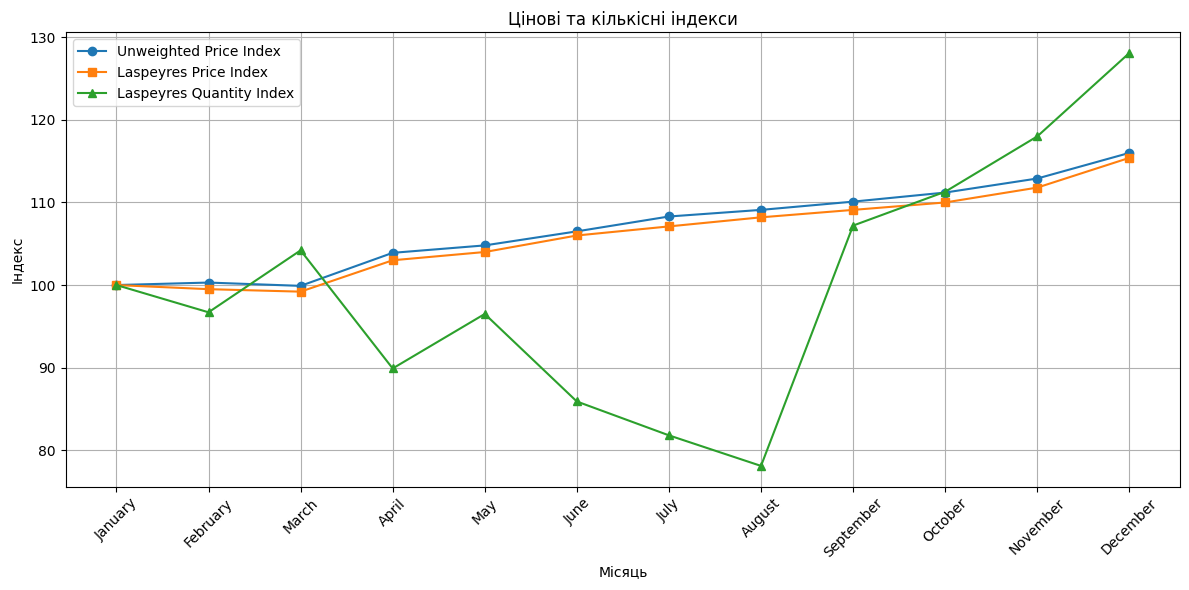

In [11]:
import matplotlib.pyplot as plt
# Побудова графіків
plt.figure(figsize=(12, 6))
plt.plot(df["month"], df["unweighted_index"], label="Unweighted Price Index", marker='o')
plt.plot(df["month"], df["laspeyres_price_index"], label="Laspeyres Price Index", marker='s')
plt.plot(df["month"], df["laspeyres_quantity_index"], label="Laspeyres Quantity Index", marker='^')
plt.title("Цінові та кількісні індекси")
plt.xlabel("Місяць")
plt.ylabel("Індекс")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 4

In [12]:
#виведення таблиці даних
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Year": [1, 2, 3, 4, 5, 6],
    "Manual": [10.60, 11.10, 11.80, 11.90, 12.30, 12.50],
    "Clerical": [8.40, 8.70, 9.10, 9.20, 9.60, 9.70],
    "Supervisory": [16.40, 17.50, 17.90, 18.80, 19.00, 19.30]
}
df = pd.DataFrame(data)

In [13]:
# (а)
# Отримуємо базові значення 
base_manual = df.loc[0, 'Manual']
base_clerical = df.loc[0, 'Clerical']
base_supervisory = df.loc[0, 'Supervisory']

# Список для збереження індексів
unweighted_indices = []
# Обчислюємо індекс для кожного року використовуючи вищезазначену фрмулу
for i in range(len(df)):
    m_ratio = (df.loc[i, 'Manual'] / base_manual)* 100
    c_ratio = (df.loc[i, 'Clerical'] / base_clerical) * 100
    s_ratio = (df.loc[i, 'Supervisory'] / base_supervisory) * 100
    index = (m_ratio + c_ratio + s_ratio)/ 3
    unweighted_indices.append(index)

# Додаємо індекс до датафрейму
df['Unweighted_Index'] = unweighted_indices

# Вивід
print(df)


   Year  Manual  Clerical  Supervisory  Unweighted_Index
0     1    10.6       8.4         16.4        100.000000
1     2    11.1       8.7         17.5        104.998576
2     3    11.8       9.1         17.9        109.600143
3     4    11.9       9.2         18.8        112.140702
4     5    12.3       9.6         19.0        115.392370
5     6    12.5       9.7         19.3        117.027882


   Year  Manual  Clerical  Supervisory  Unweighted_Index  Laspeyres_Index
0     1    10.6       8.4         16.4        100.000000       100.000000
1     2    11.1       8.7         17.5        104.998576       104.810782
2     3    11.8       9.1         17.9        109.600143       110.487326
3     4    11.9       9.2         18.8        112.140702       112.138522
4     5    12.3       9.6         19.0        115.392370       115.708675
5     6    12.5       9.7         19.3        117.027882       117.466976


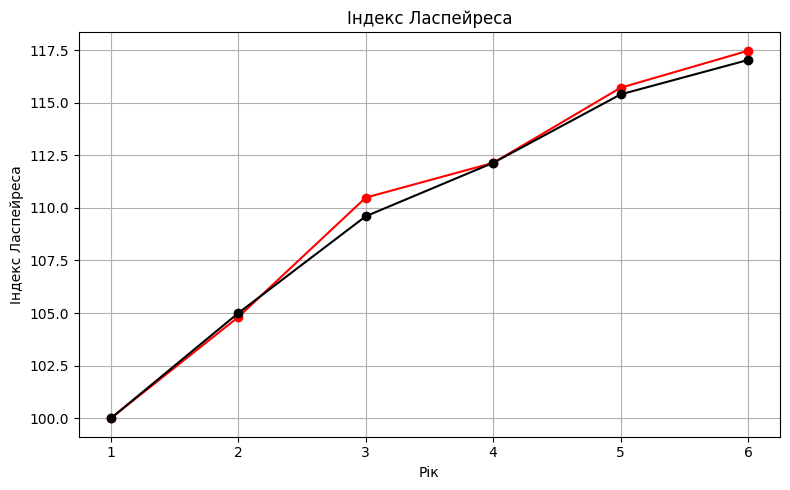

In [14]:
# (b)
import numpy as np
weights = np.array([72,23,10])
base_prices = df.loc[0, ['Manual', 'Clerical', 'Supervisory']].values

def laspeyres_index(row):
    current_prices = row[['Manual', 'Clerical', 'Supervisory']].values
    return np.dot(current_prices, weights) / np.dot(base_prices, weights) * 100

df['Laspeyres_Index'] = df.apply(laspeyres_index, axis=1)
print(df)
plt.figure(figsize=(8, 5))
plt.plot(df['Year'], df['Laspeyres_Index'], marker='o', color='red',  label= 'Індекс Ласпейреса')
plt.plot(df['Year'], df['Unweighted_Index'], marker='o', color='k',  label= 'Неваговий індекс для погодинної зарплати')
plt.title('Індекс Ласпейреса')
plt.xlabel('Рік')
plt.ylabel('Індекс Ласпейреса')
plt.grid(True)
plt.xticks(df['Year'])
plt.tight_layout()
plt.show()

### 5

In [15]:
import pandas as pd

# Індекси з базовим роком 1
df_base1 = pd.DataFrame({
    "Рік": [1, 2, 3, 4],
    "Індекс (база = 1)": [100, 108.4, 114.3, 120.2]
})

# Індекси з базовим роком 4
df_base4 = pd.DataFrame({
    "Рік": [4, 5, 6],
    "Індекс (база = 4)": [100, 103.5, 107.8]
})

In [16]:
# Отримуємо коефіцієнт для переходу на базу 4
conversion_factor = 100 / df_base1.loc[df_base1["Рік"] == 4, "Індекс (база = 1)"].values[0]

# Перераховуємо індекси з бази 1 на базу 4
df_base1["Сплайсований індекс"] = (df_base1["Індекс (база = 1)"] * conversion_factor).round(1)

# Для рядків, де рік >= 4, беремо вже існуючі значення з df_base4
df_base4["Сплайсований індекс"] = df_base4["Індекс (база = 4)"]

# Об'єднуємо обидва DataFrame
df_spliced = pd.concat([
    df_base1[["Рік", "Сплайсований індекс"]],
    df_base4[["Рік", "Сплайсований індекс"]]
]).sort_values(by="Рік").reset_index(drop=True)

print(df_spliced.to_string(index=False))

 Рік  Сплайсований індекс
   1                 83.2
   2                 90.2
   3                 95.1
   4                100.0
   4                100.0
   5                103.5
   6                107.8


### 6

Пояснення, навіщо розробляти індекс цін для групи товарів (наприклад, енергоносіїв):

Індекс цін для певної групи продуктів (як-от енергетичних) корисний тому, що:

1. Відстеження інфляції: Він показує, як змінюються ціни саме в цьому секторі. Наприклад, якщо ціни на газ і електрику різко зростуть, це може підвищити витрати виробників, а потім і ціни на інші товари.

2. Аналіз економіки: Енергія впливає на всі сфери — від заводів до побутових витрат. Індекс допомагає зрозуміти, як зміни цін на неї впливають на економіку в цілому.

3. Планування заходів уряду: Наприклад, якщо індекс показує стабільне зростання цін на паливо, уряд може запровадити субсидії або регулювання.

4. Порівняння: Можна порівняти ціни в різних регіонах або з минулими роками, щоб побачити тренди чи проблемні моменти.

Чому краще використовувати зважений індекс цін?

У зваженому індексі кожен товар має свою "вагу" — тобто важливість у загальних витратах.

Наприклад, якщо люди витрачають 60% грошей на електрику і лише 10% на вугілля, зміна цін на електрику вплине на індекс сильніше. 

Переваги:

1. Точність: Відображає реальні витрати людей або підприємств.

2. Менше спотворень: Якщо ціна на рідкісний товар (наприклад, дрова) різко зросте, це не "затьмарить" зміни в основних товарах.

3. Корисно для рішень: Уряд чи бізнес бачать, які саме товари "тягнуть" індекс вгору або вниз, і можуть діяти цілеспрямовано.

4. Зрозумілість для людей: Наприклад, сім’ї побачать, на які енергоносії їм треба звернути увагу при плануванні бюджету.

Проста різниця:

Звичайний індекс вважає всі товари однаково важливими.

Зважений індекс враховує, що деякі товари витрачаються частіше або в більших обсягах, тому їхні зміни цін важливіші.


# 17.3 A nonparametric test for randomness

Непараметричний: не вимагає знання розподілу даних.

Прогон (run): послідовність однакових символів (+ або -), де:

"+" — значення вище медіани,

"-' — значення нижче медіани.

Алгоритм тесту

1. Обчислення медіани:

Для парного n: медіана = середнє двох середніх значень у впорядкованому ряду.

Приклад: медіана = 107 + 108 = 107.5

2. Побудова послідовності: заміна даних на + та - відносно медіани.

Підрахунок прогонів (R): групи однакових символів.

Приклад: − − − − + + − − + − + + + + − → R=7.

3. Перевірка гіпотези:

Нульова гіпотеза (H0): ряд випадковий.

Альтернатива:

Одностороння: позитивна кореляція (мало прогонів).

Двостороння: невипадковість (значно більше або менше прогонів).

Малі вибірки ( n <= 20)

Використовують таблиці розподілу прогонів

![Знімок екрана 2025-05-01 184459.jpg](<attachment:Знімок екрана 2025-05-01 184459.jpg>)

Приклад: для n=16, R=7 → ймовірність 0.214

Нульову гіпотезу не відхиляють (на рівні значимості 5%), оскільки p-значення > 0.05.
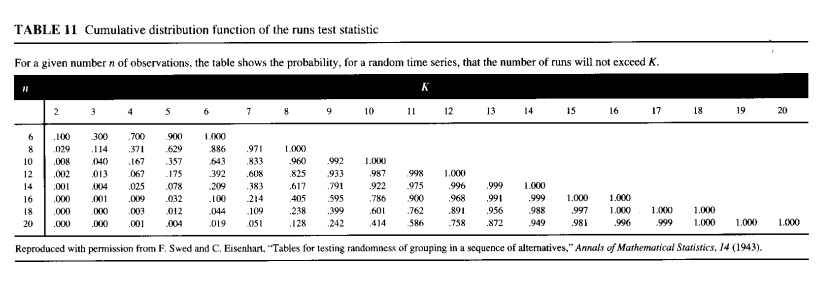

Великі вибірки (n > 20): нормальне наближення

1. Формула Z-статистики: 

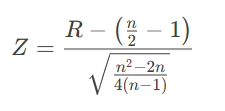

2. Правила прийняття рішення:

Односторонній тест:

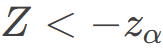

Двосторонній тест:

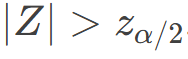

3. Приклад: n=30, R=8 → Z=−2.97.

p-значення ≈ 0.15% → нульову гіпотезу відхиляють (сильна свідченість проти випадковості).



### 8

In [17]:
# Вправа 8 
# створюємо датафрейм
# виводимо медіану(середнє of the ratio)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = {
    "Year": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    "Ratio": [1.41, 1.45, 1.57, 1.48, 1.46, 1.44, 1.43, 1.45, 1.43, 1.52, 1.37, 1.33]
}

df = pd.DataFrame(data)
median = np.median(data["Ratio"]) 
print("MEDIAN: ",median)

MEDIAN:  1.4449999999999998


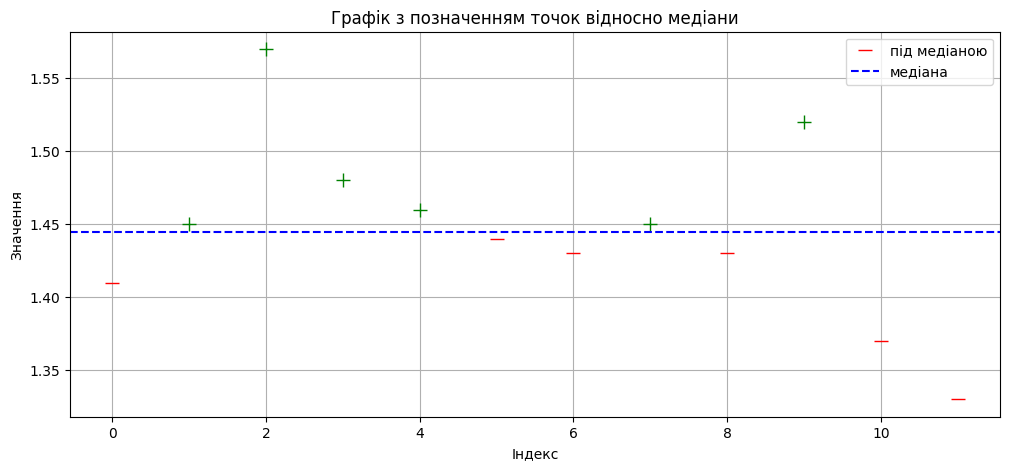

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

for i, value in enumerate(data["Ratio"]):
    if value > median:
        plt.plot(i, value, 'g+', markersize=10, label='над медіаною' if i == 0 else "")  
    else:
        plt.plot(i, value, 'r_', markersize=10, label='під медіаною' if i == 0 else "") 

plt.axhline(median, color='b', linestyle='--', label='медіана')

# Підписи
plt.title("Графік з позначенням точок відносно медіани")
plt.xlabel("Індекс")
plt.ylabel("Значення")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
# Побудова послідовності знаків
# Обчислення кількості runs
# Очікувана кількість runs та стандартне відхилення
signs = ['+' if x > median else '-' for x in data["Ratio"]]
runs = 1
for i in range(1, len(signs)):
    if signs[i] != signs[i-1]:
        runs += 1
        
n1 = signs.count('+')
n2 = signs.count('-')

expected_runs = ((2 * n1 * n2) / (n1 + n2)) + 1
std_dev = np.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / (((n1 + n2)**2) * (n1 + n2 - 1)))
p = (runs - expected_runs) / std_dev

print(f"Runs: {runs}")
print(f"Очікувана кількість runs: {expected_runs:.2f}")
print(f"стандартне відхилення: {std_dev:.2f}")



Runs: 7
Очікувана кількість runs: 7.00
стандартне відхилення: 1.65


### 10

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Дані з таблиці (ціни на золото за 14 років)
data = {
    'YEAR': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'PRICE ($)': [135, 166, 227, 533, 591, 399, 450, 385, 308, 329, 405, 486, 410, 369]
}

# Створення DataFrame
df = pd.DataFrame(data)
prices = df['PRICE ($)'].tolist()

In [21]:
# # Крок 1: Обчислення медіани
median = np.median(prices) #Вирахуємо медіану

In [22]:
# Крок 2: Побудова послідовності '+' та '-'
signs = ['+' if x > median else '-' for x in data["PRICE ($)"]]
runs = 1
for i in range(1, len(signs)):
    if signs[i] != signs[i-1]:
        runs += 1
        
n1 = signs.count('+')
n2 = signs.count('-')

In [23]:
# Крок 3: Підрахунок прогонів (групи однакових символів)
runs = 1
for i in range(1, len(signs)):
    if signs[i] != signs[i-1]:
        runs += 1

In [24]:
# Крок 4: Обчислення z-статистики
expected_runs = ((2 * n1 * n2) / (n1 + n2)) + 1
std_dev = np.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / (((n1 + n2)**2) * (n1 + n2 - 1)))
z = (runs - expected_runs) / std_dev

In [25]:
# Крок 5: Визначення p-значення (двосторонній тест)
p_value = 2 * (1 - norm.cdf(abs(z)))  # Подвоєння для двостороннього тесту

In [27]:
# Вивід результатів
print(f"Медіана: {median}")
print(f"Послідовність: {' '.join(signs)}")
print(f"Кількість прогонів (R): {runs}")
print(f"z-статистика: {z:.3f}")
print(f"p-значення: {p_value:.3f}")

Медіана: 392.0
Послідовність: - - - + + + + - - - + + + -
Кількість прогонів (R): 5
z-статистика: -1.669
p-значення: 0.095


In [28]:
# Висновок
alpha = 0.05
if p_value < alpha:
    print("\nВисновок: Ряд НЕ є випадковим (відхиляємо H₀)")
else:
    print("\nВисновок: Ряд випадковий (немає підстав відхилити H₀)")


Висновок: Ряд випадковий (немає підстав відхилити H₀)


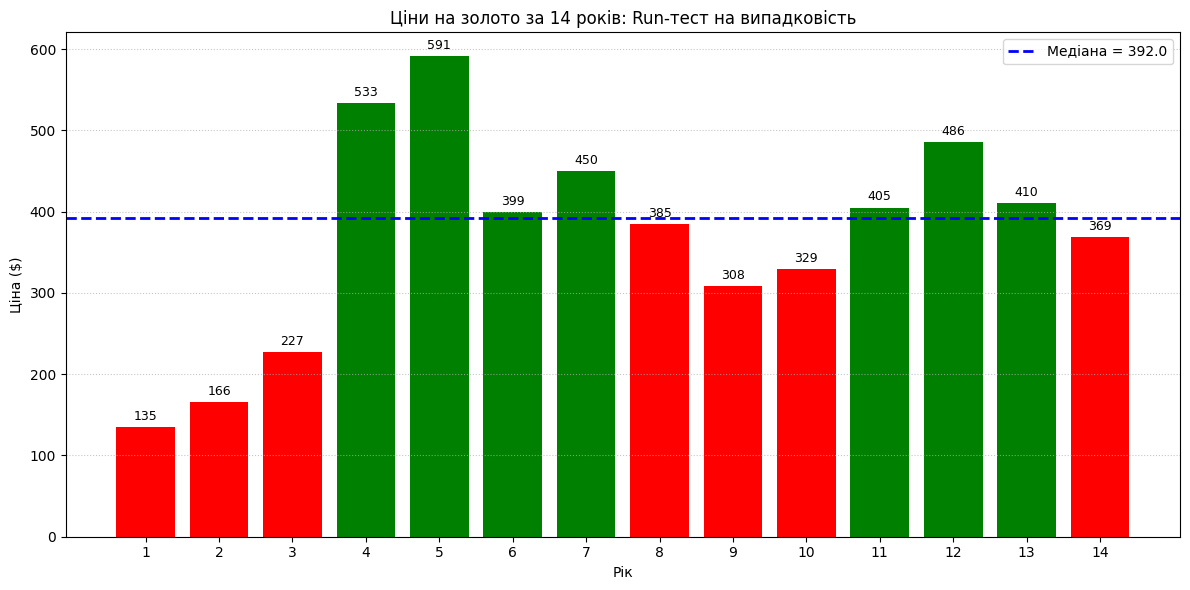

In [29]:
import matplotlib.pyplot as plt

# Кольори: зелений, якщо більше медіани, червоний — якщо менше або дорівнює
colors = ['green' if price > median else 'red' for price in prices]

plt.figure(figsize=(12, 6))
bars = plt.bar(df['YEAR'], prices, color=colors)

# Лінія медіани
plt.axhline(median, color='blue', linestyle='--', linewidth=2, label=f'Медіана = {median}')

# Підписи
plt.title("Ціни на золото за 14 років: Run-тест на випадковість")
plt.xlabel("Рік")
plt.ylabel("Ціна ($)")
plt.xticks(df['YEAR'])
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend()

# Додавання значень над стовпчиками
for bar, price in zip(bars, prices):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{price}', 
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


### 12

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Дані з таблиці
data = {
    'YEAR': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
    'EARNINGS': [50.2, 33.9, 20.6, 25.4, 32.9, 31.3, 18.8, 14.5, 17.5, 23.6, 20.6, 21.6, 27.6, 36.5, 49.3, 45.4, 35.6, 30.1, 25.5, 22.4, 12.3, 20.9, 42.8, 86.3, 73.6, 47.7, 56.6, 53.1]
}

df = pd.DataFrame(data)
earnings = df['EARNINGS'].tolist()

In [31]:
# Медіана
median = np.median(earnings)

In [32]:
# Послідовність '+' та '-'
signs = ['+' if x > median else '-' for x in earnings]

In [33]:
# Підрахунок прогонів
runs = 1
for i in range(1, len(signs)):
    if signs[i] != signs[i-1]:
        runs += 1

n1 = signs.count('+')
n2 = signs.count('-')

In [34]:
# z-статистика
expected_runs = ((2 * n1 * n2) / (n1 + n2)) + 1
std_dev = np.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / (((n1 + n2)**2) * (n1 + n2 - 1)))
z = (runs - expected_runs) / std_dev

In [35]:
# p-значення (двосторонній тест)
p_value = 2 * (1 - norm.cdf(abs(z)))

In [36]:
# Вивід результатів
print(f"Медіана: {median:.1f}")
print(f"Послідовність: {' '.join(signs)}")
print(f"Кількість прогонів (R): {runs}")
print(f"z-статистика: {z:.2f}")
print(f"p-значення: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("\nВисновок: Ряд НЕ є випадковим (відхиляємо H₀)")
else:
    print("\nВисновок: Ряд випадковий (немає підстав відхилити H₀)")

Медіана: 30.7
Послідовність: + + - - + + - - - - - - - + + + + - - - - - + + + + + +
Кількість прогонів (R): 7
z-статистика: -3.08
p-значення: 0.0021

Висновок: Ряд НЕ є випадковим (відхиляємо H₀)


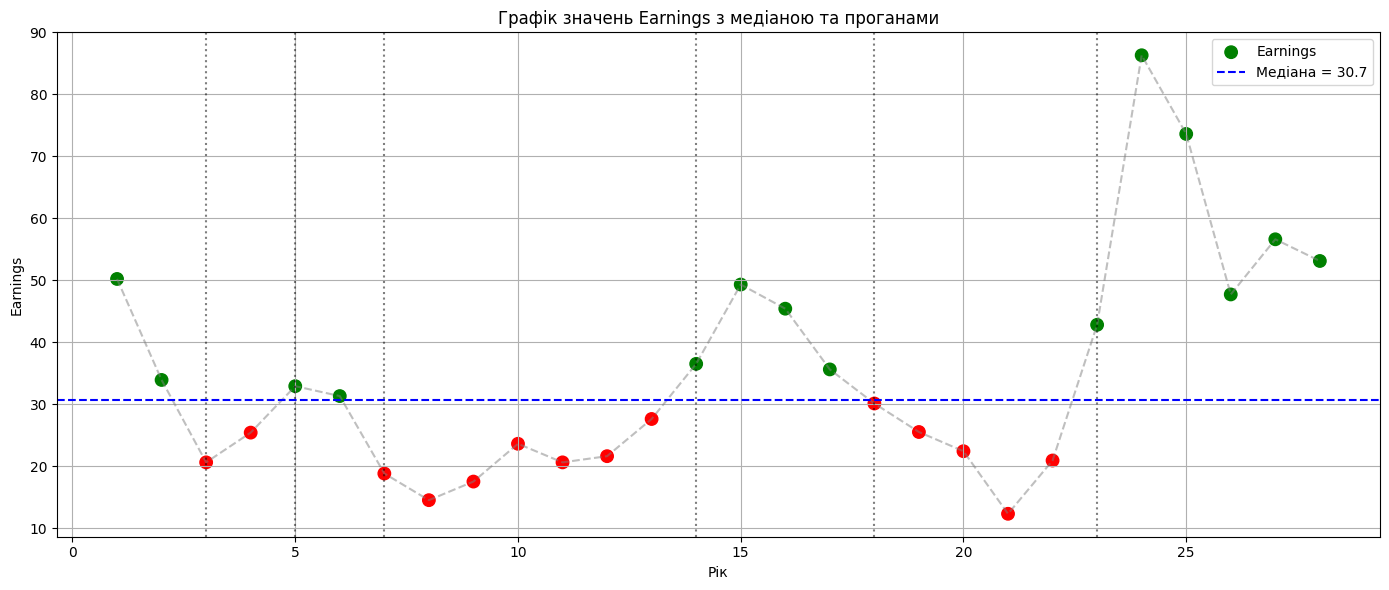

In [37]:
import matplotlib.pyplot as plt

# Побудова графіка
plt.figure(figsize=(14, 6))
colors = ['green' if x > median else 'red' for x in earnings]
plt.scatter(df['YEAR'], earnings, c=colors, s=80, label='Earnings')
plt.plot(df['YEAR'], earnings, color='gray', linestyle='--', alpha=0.5)

# Лінія медіани
plt.axhline(median, color='blue', linestyle='--', label=f'Медіана = {median:.1f}')

# Вертикальні лінії в місцях прогонів
for i in range(1, len(signs)):
    if signs[i] != signs[i - 1]:
        plt.axvline(df['YEAR'][i], color='black', linestyle=':', alpha=0.5)

plt.title("Графік значень Earnings з медіаною та проганами")
plt.xlabel("Рік")
plt.ylabel("Earnings")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 17.5 Moving averages

Зглажування допомагає позбавитися від випадкових коливань ("шумy") у даних, щоб побачити основні тенденції, цикли або сезонність.

Проста центрована ковзна середня

Кожне значення замінюється на середнє арифметичне з себе та сусідів.

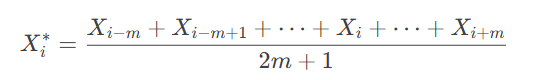

Особливості методу

* Втрата даних: З кожного кінця ряду "відкидається" по m значень.

Наприклад: Якщо дані за 30 років (1931–1960), то згладжений ряд буде за 1933–1958 роки (26 значень).

* Вибір m:

Мале m (напр. 1): слабке згладжування, але зберігаються деталі.

Велике m (напр. 5): сильне згладжування, але можлива втрата важливих змін.


Зважені ковзні середні

Центральному значенню надається більша вага. Краще зберігає тенденції, менше реагує на різкі викиди.

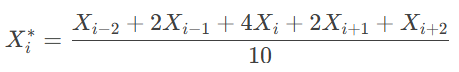

Використовують для:

* Візуалізація даних (наприклад, графіки продажів).

* Попередній аналіз перед складними методами (напр., ARIMA).

Обмеження:

* Не підходить для прогнозування (бо "втрачає" останні дані).

* Не враховує тренди або сезонність автоматично.

# 17.6 Extraction of the seasonal component through moving avarages

* Ковзні середні для видалення сезонності:

Для квартальних даних обчислюють 4-точкові ковзні середні:

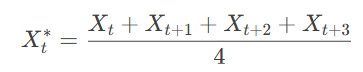

* Центрування ковзних середніх:

Для узгодження з часовими мітками вихідного ряду беруть середнє з пар сусідніх ковзних середніх:

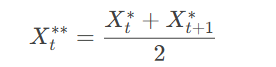

Втрачаються перші та останні 2 спостереження.

Метод сезонних індексів

1. Обчислення сезонних індексів:

* Для кожного кварталу знаходять медіану відсоткового співвідношення:

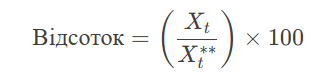

* Медіани коригують так, щоб їх середнє дорівнювало 100%:

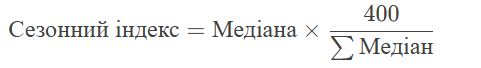

2. Сезонна корекція:

Скориговані значення обчислюються за формулою: 

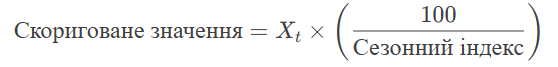



Недоліки простого методу:

* Не враховує зміни сезонних паттернів з часом.

* Втрата даних на краях ряду.

Census X-11:

* Використовує складніші формули з 12-точковими ковзними середніми.

* Враховує еволюцію сезонності та прогнози для майбутніх значень.

### 13

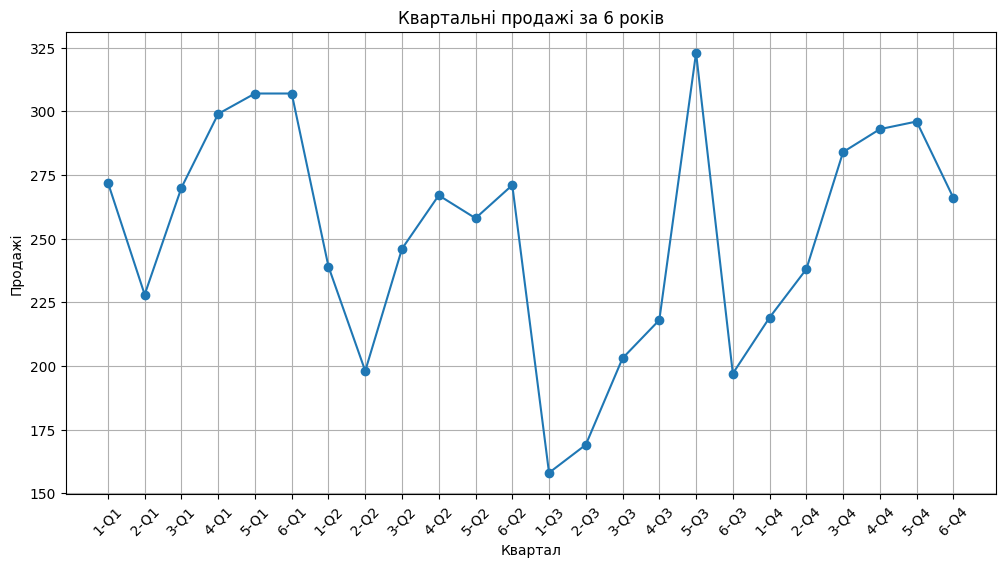

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# Частина (a): Побудова часового графіка
# ----------------------------

# Вхідні дані
data = {
    'Year': [1, 2, 3, 4, 5, 6],
    'Q1': [272, 228, 270, 299, 307, 307],
    'Q2': [239, 198, 246, 267, 258, 271],
    'Q3': [158, 169, 203, 218, 323, 197],
    'Q4': [219, 238, 284, 293, 296, 266]
}

# Створення DataFrame 
df = pd.DataFrame(data)
df_long = df.melt(id_vars='Year', var_name='Quarter', value_name='Sales')
df_long['Time'] = df_long['Year'].astype(str) + '-' + df_long['Quarter']

# Побудова графіка
plt.figure(figsize=(12, 6))
plt.plot(df_long['Time'], df_long['Sales'], marker='o', linestyle='-')
plt.title('Квартальні продажі за 6 років')
plt.xlabel('Квартал')
plt.ylabel('Продажі')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

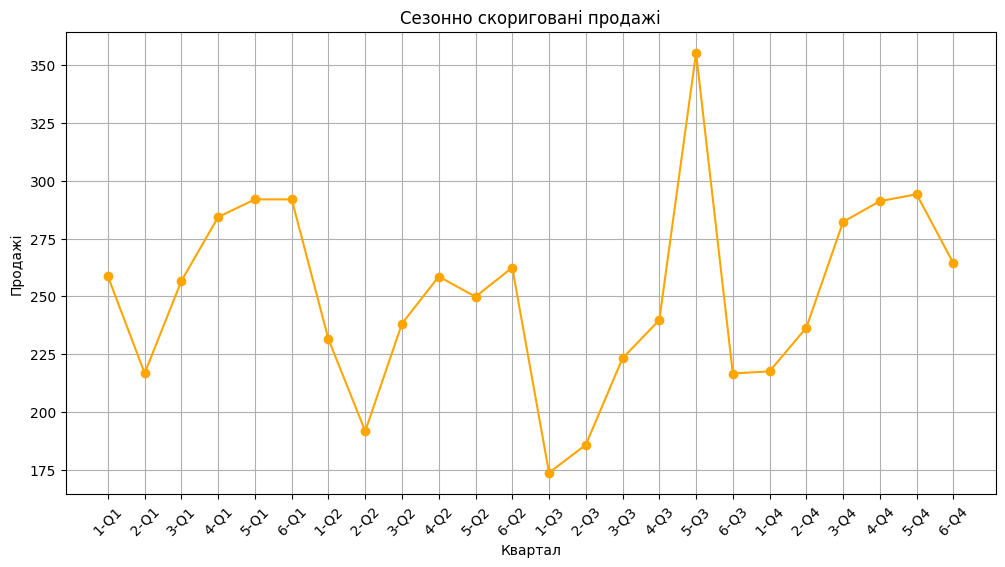

In [39]:
# ----------------------------
# Частина (b): Сезонне коригування
# ----------------------------

# Крок 1: Обчислення 4-точкових ковзних середніх
sales = df_long['Sales'].values
window_size = 4
moving_avg = np.convolve(sales, np.ones(window_size)/window_size, mode='valid')

# Крок 2: Центрування ковзних середніх (для парних вікон)
centered_ma = []
for i in range(len(moving_avg)-1):
    centered_ma.append((moving_avg[i] + moving_avg[i+1]) / 2)

# Крок 3: Розрахунок відсотків від центрованих середніх
# Зіставлення даних (відкидаємо перші 2 та останні 2 квартали)
adjusted_data = df_long.iloc[2:-2].copy()
adjusted_data['Centered_MA'] = centered_ma
adjusted_data['Percentage'] = (adjusted_data['Sales'] / adjusted_data['Centered_MA']) * 100

# Крок 4: Обчислення сезонних індексів (медіани по кварталах)
seasonal_index = adjusted_data.groupby('Quarter')['Percentage'].median()

# Корекція індексів (сума має бути 400 для кварталів)
correction_factor = 400 / seasonal_index.sum()
seasonal_index *= correction_factor

# Крок 5: Сезонне коригування вихідних даних
df_long['Seasonal_Index'] = df_long['Quarter'].map(seasonal_index)
df_long['Adjusted_Sales'] = df_long['Sales'] * (100 / df_long['Seasonal_Index'])

# Графік скоригованого ряду
plt.figure(figsize=(12, 6))
plt.plot(df_long['Time'], df_long['Adjusted_Sales'], marker='o', color='orange', linestyle='-')
plt.title('Сезонно скориговані продажі')
plt.xlabel('Квартал')
plt.ylabel('Продажі')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

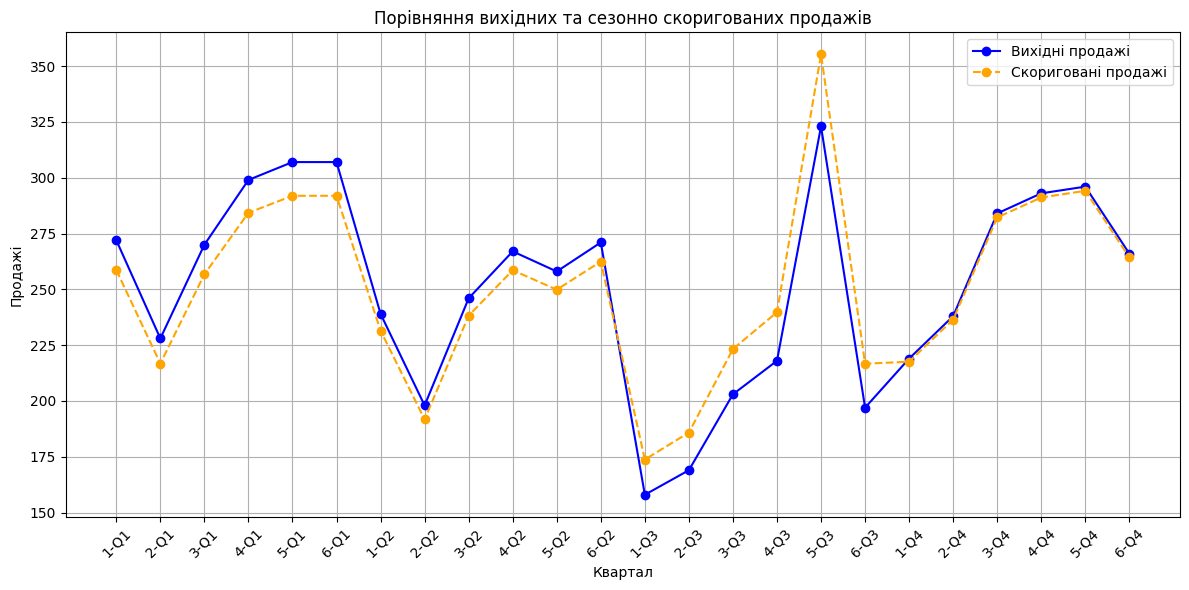

In [40]:
# Побудова обох графіків на одній діаграмі
plt.figure(figsize=(12, 6))

# Вихідні дані
plt.plot(df_long['Time'], df_long['Sales'], marker='o', linestyle='-', label='Вихідні продажі', color='blue')

# Сезонно скориговані
plt.plot(df_long['Time'], df_long['Adjusted_Sales'], marker='o', linestyle='--', label='Скориговані продажі', color='orange')

plt.title('Порівняння вихідних та сезонно скоригованих продажів')
plt.xlabel('Квартал')
plt.ylabel('Продажі')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 16

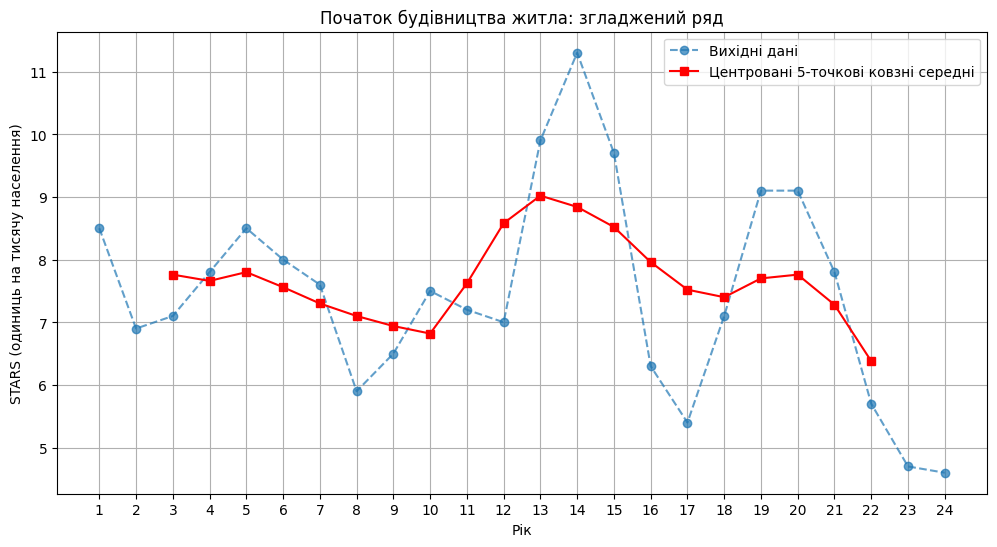

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Завантаження даних
data = {
    'YEAR': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
    'STARS': [8.5, 6.9, 7.1, 7.8, 8.5, 8.0, 7.6, 5.9, 6.5, 7.5, 7.2, 7.0, 9.9, 11.3, 9.7, 6.3, 5.4, 7.1, 9.1, 9.1, 7.8, 5.7, 4.7, 4.6]
}

df = pd.DataFrame(data)

cma_point=5
df['cma'] =df['STARS'].rolling(cma_point, center=True).mean()

# Побудова графіка
plt.figure(figsize=(12, 6))
plt.plot(df['YEAR'], df['STARS'], marker='o', linestyle='--', label='Вихідні дані', alpha=0.7)
plt.plot(df['YEAR'], df['cma'], marker='s', color='red', label='Центровані 5-точкові ковзні середні')
plt.title('Початок будівництва житла: згладжений ряд')
plt.xlabel('Рік')
plt.ylabel('STARS (одиниць на тисячу населення)')
plt.legend()
plt.grid(True)
plt.xticks(df['YEAR'])
plt.show()

### 19

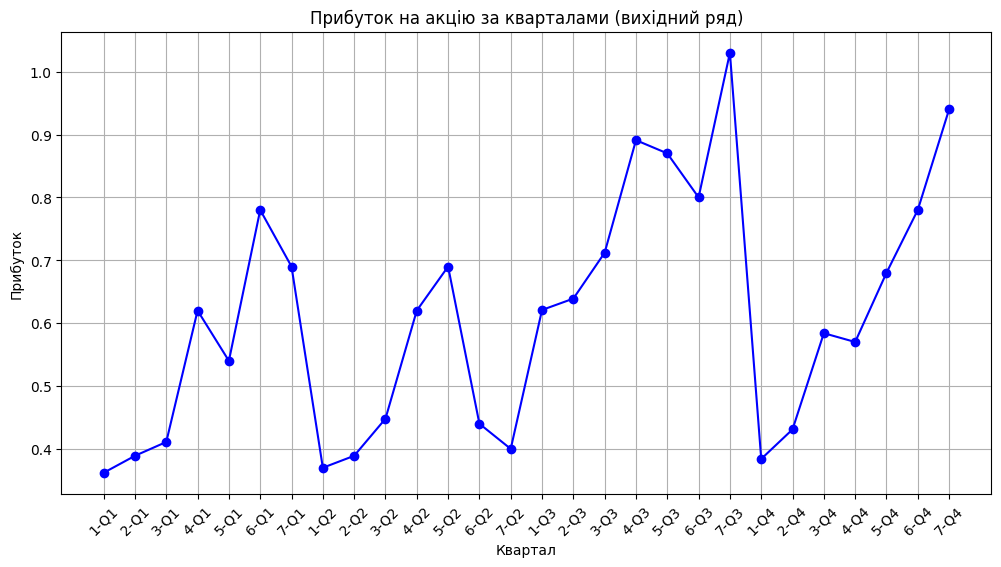

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Частина (a): Побудова часового графіка та аналіз сезонності
# ----------------------------

# Вхідні дані
data = {
    'Year': [1, 2, 3, 4, 5, 6, 7],
    'Q1': [0.362, 0.389, 0.411, 0.620, 0.540, 0.780, 0.690],
    'Q2': [0.370, 0.389, 0.448, 0.620, 0.690, 0.440, 0.400],
    'Q3': [0.621, 0.639, 0.712, 0.891, 0.870, 0.800, 1.030],
    'Q4': [0.384, 0.431, 0.584, 0.570, 0.680, 0.780, 0.940]
}

# Створення DataFrame та перетворення у "довгий" формат
df = pd.DataFrame(data)
df_long = df.melt(id_vars='Year', var_name='Quarter', value_name='Earnings')
df_long['Time'] = df_long['Year'].astype(str) + '-' + df_long['Quarter']

# Побудова графіка
plt.figure(figsize=(12, 6))
plt.plot(df_long['Time'], df_long['Earnings'], marker='o', linestyle='-', color='blue')
plt.title('Прибуток на акцію за кварталами (вихідний ряд)')
plt.xlabel('Квартал')
plt.ylabel('Прибуток')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


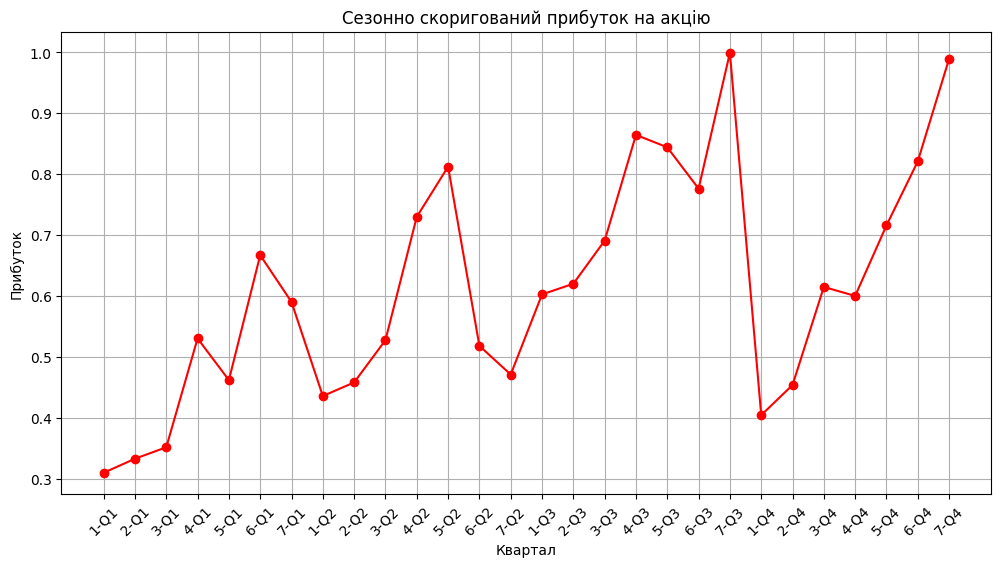

In [ ]:
# ----------------------------
# Частина (b): Сезонна корекція методом сезонних індексів
# ----------------------------

# Крок 1: Обчислення 4-точкових ковзних середніх
sales = df_long['Earnings'].values
window_size = 4
moving_avg = np.convolve(sales, np.ones(window_size)/window_size, mode='valid')

# Крок 2: Центрування ковзних середніх 
centered_ma = [(moving_avg[i] + moving_avg[i+1]) / 2 for i in range(len(moving_avg)-1)]

# Крок 3: Розрахунок відсотків від центрованих середніх
adjusted_data = df_long.iloc[2:-2].copy()  # Відкидаємо перші 2 та останні 2 квартали
adjusted_data['Centered_MA'] = centered_ma
adjusted_data['Percentage'] = (adjusted_data['Earnings'] / adjusted_data['Centered_MA']) * 100

# Крок 4: Обчислення сезонних індексів (медіани по кварталах)
seasonal_index = adjusted_data.groupby('Quarter')['Percentage'].median()

# Корекція індексів (сума має бути 400)
correction_factor = 400 / seasonal_index.sum()
seasonal_index *= correction_factor

# Крок 5: Сезонна корекція даних
df_long['Seasonal_Index'] = df_long['Quarter'].map(seasonal_index)
df_long['Adjusted_Earnings'] = df_long['Earnings'] * (100 / df_long['Seasonal_Index'])

# Побудова графіка скоригованого ряду
plt.figure(figsize=(12, 6))
plt.plot(df_long['Time'], df_long['Adjusted_Earnings'], marker='o', color='red', linestyle='-')
plt.title('Сезонно скоригований прибуток на акцію')
plt.xlabel('Квартал')
plt.ylabel('Прибуток')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

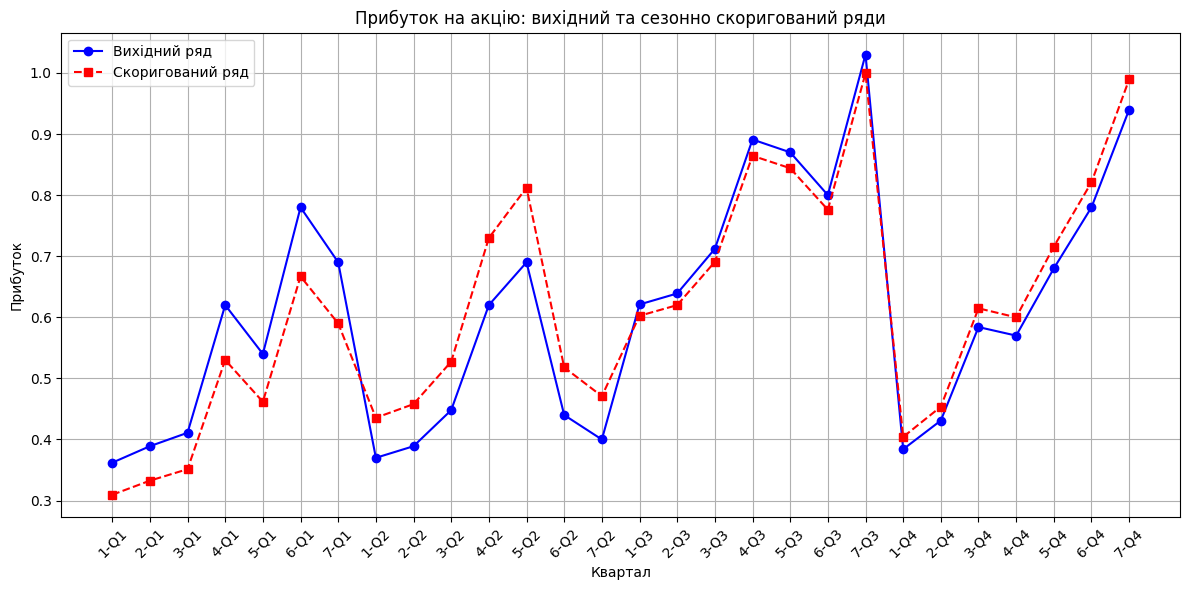

In [44]:
# Побудова накладених графіків
plt.figure(figsize=(12, 6))
plt.plot(df_long['Time'], df_long['Earnings'], marker='o', linestyle='-', color='blue', label='Вихідний ряд')
plt.plot(df_long['Time'], df_long['Adjusted_Earnings'], marker='s', linestyle='--', color='red', label='Скоригований ряд')

plt.title('Прибуток на акцію: вихідний та сезонно скоригований ряди')
plt.xlabel('Квартал')
plt.ylabel('Прибуток')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 17.7 Simple exponential smoothing

Просте експоненціальне згладжування (SES) 

SES використовується для прогнозування часових рядів без тренду та сезонності. Метод ґрунтується на зваженому середньому поточних і минулих спостережень, де ваги експоненційно зменшуються для старіших даних.

Рівень ряду на час t оцінюється за формулою:

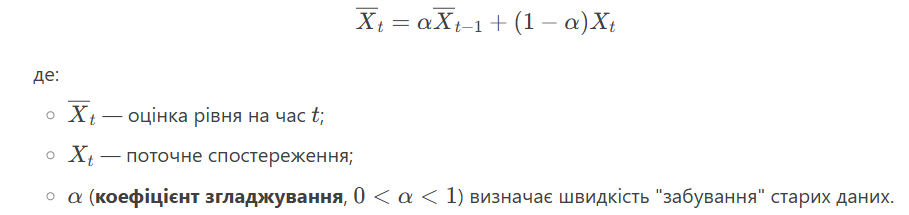

Вибір α:

При α → 1: більша вага новим даним (швидка реакція на зміни).

При α → 0: більша вага старим даним (плавне згладжування).

Оптимальне α вибирається через мінімізацію суми квадратів помилок (SS):

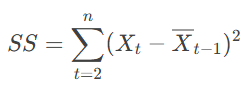




Практичне застосування :

* Ініціалізація:

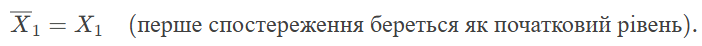

* Прогнозування : 

Прогноз для будь-якого майбутнього періоду t+h (h ≥ 1) — це останній оцінений рівень:

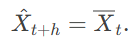

* Вибір α:

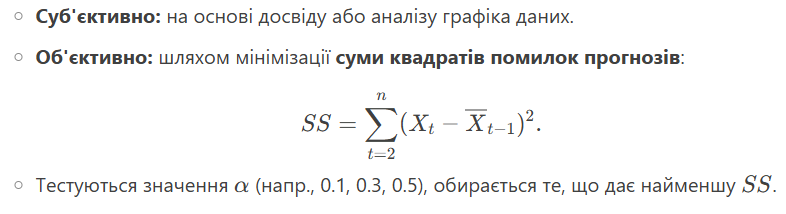



Цей метод допомагає передбачити майбутнє, використовуючи минулі дані, але так, що останні числа впливають сильніше, а старі — слабше. Наприклад, якщо ти прогнозуєш продажі, то дані за останній місяць будуть важливішими, ніж за минулий рік. 

Кожен новий прогноз — це суміш між минулим прогнозом і новим числом.

Чим більше параметр α (від 0 до 1), тим швидше метод реагує на зміни. Якщо α = 0.9, враховуються майже тільки останні дані. Якщо α = 0.1, старі дані впливають довше.

### Метод "запам’ятовує" минуле, але поступово про нього забуває, щоб краще враховувати нову інформацію. 

### Метод працює, якщо дані не зростають/не падають постійно.

### Метод підходить якщо дані не мають тренду (напр., постійного зростання) та сезонності (напр., зимових злетів продажів).

Наприклад, для прогнозування цін на акції або щоденних температур.

### 22

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Дані
data = {
    'YEAR': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'RATIO': [1.41, 1.45, 1.57, 1.48, 1.46, 1.44, 1.43, 1.45, 1.43, 1.52, 1.37, 1.33]
}
df = pd.DataFrame(data)
X = df['RATIO'].tolist()
alpha = 0.4
forecast_years = 4

# --- 1. Книжкова SES-реалізація ---
def ses_book(X, alpha):
    smoothed = [X[0]]
    for t in range(1, len(X)):
        X_bar_t = alpha * smoothed[t-1] + (1 - alpha) * X[t]
        smoothed.append(round(X_bar_t, 2))
    return smoothed

def ses_forecasts(smoothed, h):
    return [smoothed[-1]] * h

def calculate_ss(X, smoothed):
    ss = 0.0
    for t in range(1, len(X)):
        error = X[t] - smoothed[t-1]
        ss += error ** 2
    return ss

In [46]:
# Застосування книжкової моделі
smoothed_book = ses_book(X, alpha)
ss_book = calculate_ss(X, smoothed_book)
forecast_book = ses_forecasts(smoothed_book, forecast_years)
df['Book SES'] = smoothed_book
forecast_years_list = list(range(len(X)+1, len(X)+forecast_years+1))
forecast_df_book = pd.DataFrame({'YEAR': forecast_years_list, 'Book Forecast': forecast_book})

In [47]:
# --- 2. Вбудована SES-модель з statsmodels ---
model = SimpleExpSmoothing(X, initialization_method="legacy-heuristic").fit(smoothing_level=alpha, optimized=False)
smoothed_embedded = model.fittedvalues
forecast_embedded = model.forecast(steps=forecast_years)
ss_embedded = calculate_ss(X, smoothed_embedded)
df['Embedded SES'] = smoothed_embedded
forecast_df_embedded = pd.DataFrame({'YEAR': forecast_years_list, 'Embedded Forecast': forecast_embedded})

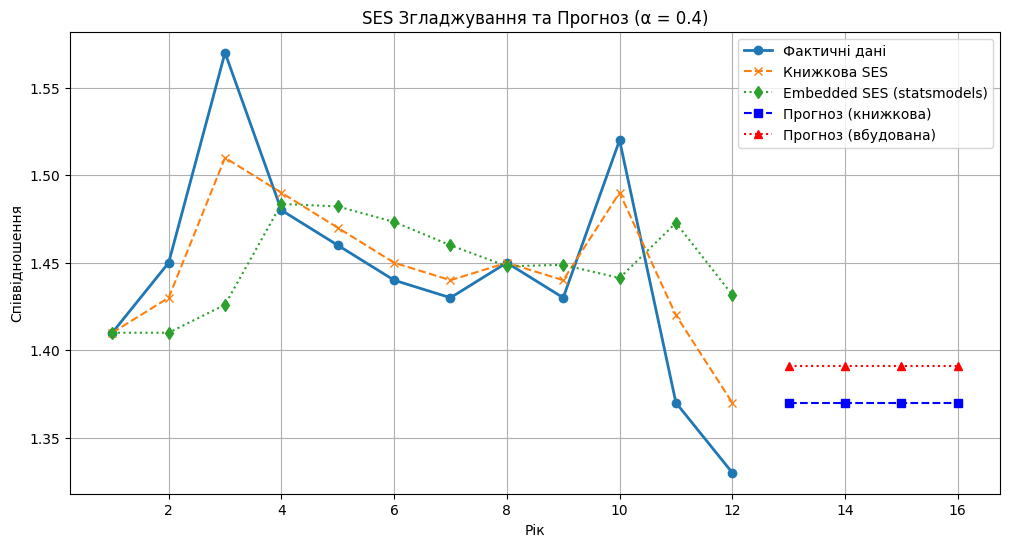

In [48]:
# --- Графік ---
plt.figure(figsize=(12, 6))
plt.plot(df['YEAR'], df['RATIO'], marker='o', label='Фактичні дані', linewidth=2)
plt.plot(df['YEAR'], df['Book SES'], linestyle='--', marker='x', label='Книжкова SES')
plt.plot(df['YEAR'], df['Embedded SES'], linestyle=':', marker='d', label='Embedded SES (statsmodels)')
plt.plot(forecast_df_book['YEAR'], forecast_df_book['Book Forecast'], linestyle='--', marker='s', label='Прогноз (книжкова)', color='blue')
plt.plot(forecast_df_embedded['YEAR'], forecast_df_embedded['Embedded Forecast'], linestyle=':', marker='^', label='Прогноз (вбудована)', color='red')
plt.title(f'SES Згладжування та Прогноз (α = {alpha})')
plt.xlabel('Рік')
plt.ylabel('Співвідношення')
plt.grid(True)
plt.legend()
plt.show()

In [49]:
# --- Вивід SS ---
print(f"Сума квадратів помилок (SS) — Книжкова модель: {round(ss_book, 4)}")
print(f"Сума квадратів помилок (SS) — Вбудована модель: {round(ss_embedded, 4)}")

Сума квадратів помилок (SS) — Книжкова модель: 0.0537
Сума квадратів помилок (SS) — Вбудована модель: 0.0653


### 25

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Дані
data = {
    'YEAR': list(range(1, 19)),
    'EARNINGS': [3.63, 3.62, 3.66, 5.31, 6.14, 6.42, 7.01, 6.37,
                 5.82, 4.98, 3.43, 3.40, 3.54, 1.65, 2.15, 6.09, 5.95, 6.26]
}
df = pd.DataFrame(data)
X = df['EARNINGS'].tolist()

In [51]:
# Книжкова реалізація SES
def ses(X, alpha):
    smoothed = [X[0]]
    for t in range(1, len(X)):
        X_bar_t = alpha * smoothed[t-1] + (1 - alpha) * X[t]
        smoothed.append(round(X_bar_t, 2))
    return smoothed

# Обчислення MSE
def calculate_mse(X, smoothed):
    mse = 0
    for t in range(1, len(X)):
        error = X[t] - smoothed[t-1]
        mse += error ** 2
    return mse / (len(X) - 1)

# Параметри згладжування
alphas = [0.2, 0.4, 0.6, 0.8]
results_book = {}
results_embedded = {}

In [52]:
for alpha in alphas:
    # Книжкова модель
    smoothed_book = ses(X, alpha)
    mse_book = calculate_mse(X, smoothed_book)
    df[f'Book SES (α={alpha})'] = smoothed_book
    results_book[alpha] = mse_book

    # Вбудована модель з statsmodels
    model = SimpleExpSmoothing(X, initialization_method='legacy-heuristic').fit(smoothing_level=alpha, optimized=False)
    smoothed_embedded = model.fittedvalues
    mse_embedded = calculate_mse(X, smoothed_embedded)
    df[f'Embedded SES (α={alpha})'] = smoothed_embedded
    results_embedded[alpha] = mse_embedded

In [53]:
# MSE для обох способів
print("\nMSE для книжкової моделі:")
for alpha in alphas:
    print(f"α = {alpha}: MSE = {results_book[alpha]:.4f}")

print("\nMSE для вбудованої моделі:")
for alpha in alphas:
    print(f"α = {alpha}: MSE = {results_embedded[alpha]:.4f}")


MSE для книжкової моделі:
α = 0.2: MSE = 1.7338
α = 0.4: MSE = 2.0194
α = 0.6: MSE = 2.4739
α = 0.8: MSE = 2.9671

MSE для вбудованої моделі:
α = 0.2: MSE = 3.8680
α = 0.4: MSE = 4.0016
α = 0.6: MSE = 3.8383
α = 0.8: MSE = 3.6779


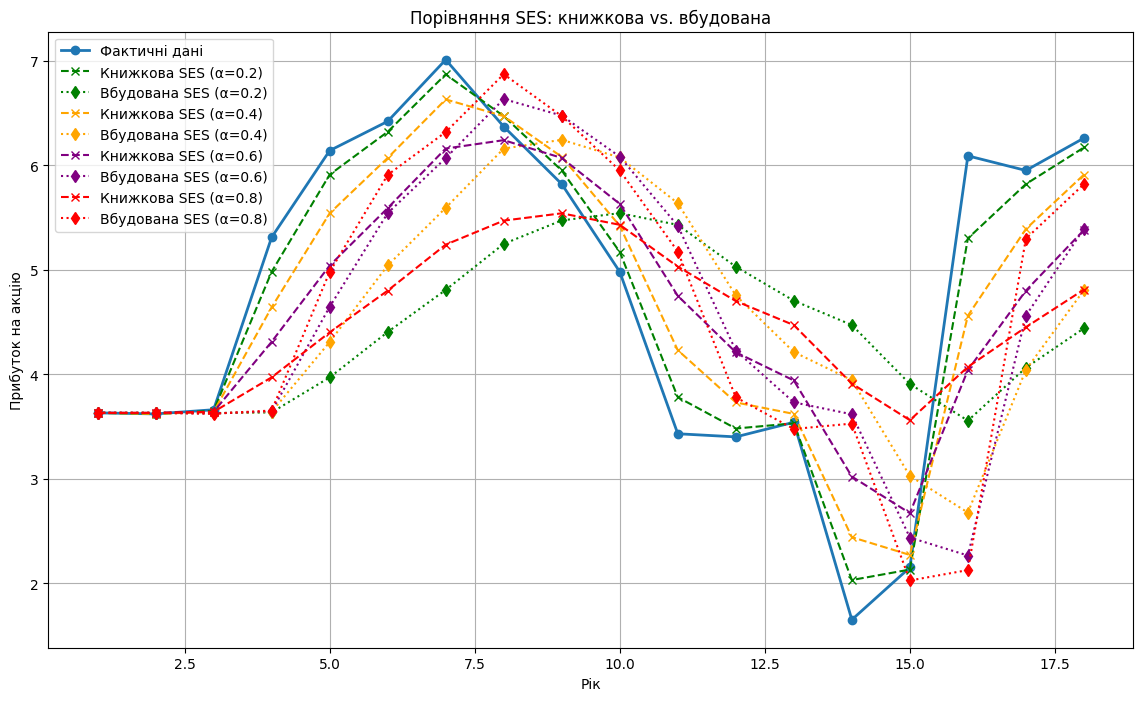

In [54]:
# Побудова графіка
plt.figure(figsize=(14, 8))
plt.plot(df['YEAR'], df['EARNINGS'], marker='o', label='Фактичні дані', linewidth=2)

colors = ['green', 'orange', 'purple', 'red']
for idx, alpha in enumerate(alphas):
    plt.plot(df['YEAR'], df[f'Book SES (α={alpha})'], linestyle='--', marker='x',
             color=colors[idx], label=f'Книжкова SES (α={alpha})')
    plt.plot(df['YEAR'], df[f'Embedded SES (α={alpha})'], linestyle=':', marker='d',
             color=colors[idx], label=f'Вбудована SES (α={alpha})')

plt.title('Порівняння SES: книжкова vs. вбудована')
plt.xlabel('Рік')
plt.ylabel('Прибуток на акцію')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
# Найкраще alpha для кожного підходу
best_alpha_book = min(results_book, key=results_book.get)
best_alpha_embedded = min(results_embedded, key=results_embedded.get)

print(f"\nНайкраще α (книжкова SES): {best_alpha_book} (MSE = {results_book[best_alpha_book]:.4f})")
print(f"Найкраще α (вбудована SES): {best_alpha_embedded} (MSE = {results_embedded[best_alpha_embedded]:.4f})")


Найкраще α (книжкова SES): 0.2 (MSE = 1.7338)
Найкраще α (вбудована SES): 0.8 (MSE = 3.6779)


# 17.8 The Holt-Winters exponential smoothing forecasting model

Модель Холта-Вінтерса дозволяє будувати точні прогнози для рядів з трендом та сезонністю. 

Ключові етапи: ініціалізація, оновлення рівня/тренду/сезонності та прогнозування шляхом їх комбінації.

Незональні часові ряди

їх ціль прогнозування з урахуванням рівня та тренду.

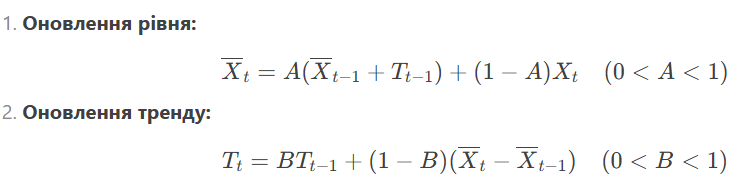

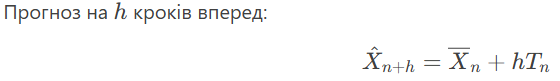

Сезонні часові ряди

(Прогнозування з урахуванням рівня, тренду та сезонності)

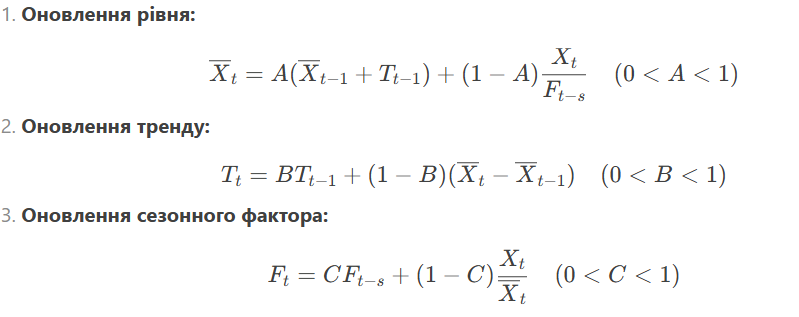

Використовуються ковзні середні для оцінки початкового рівня ( X t ) та сезонних факторів (F t).

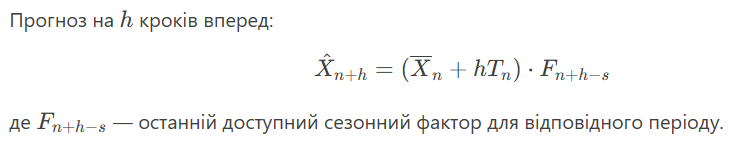

Алгоритм рекурсивний, потребує зберігання лише останніх оцінок.

Ідеально підходить для автоматизації.

### 30

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Дані з таблиці
months = list(range(1, 25))
earnings = [
    10.58, 10.67, 10.48, 10.59, 10.67, 10.74, 10.74, 10.80,
    10.84, 10.87, 10.81, 10.93, 10.94, 10.96, 11.05, 10.83,
    11.05, 11.02, 11.06, 11.11, 11.15, 11.19, 11.22, 11.17
]

df = pd.DataFrame({'Month': months, 'Earnings': earnings})

Прогноз для місяця 25: 11.25
Прогноз для місяця 26: 11.28
Прогноз для місяця 27: 11.31


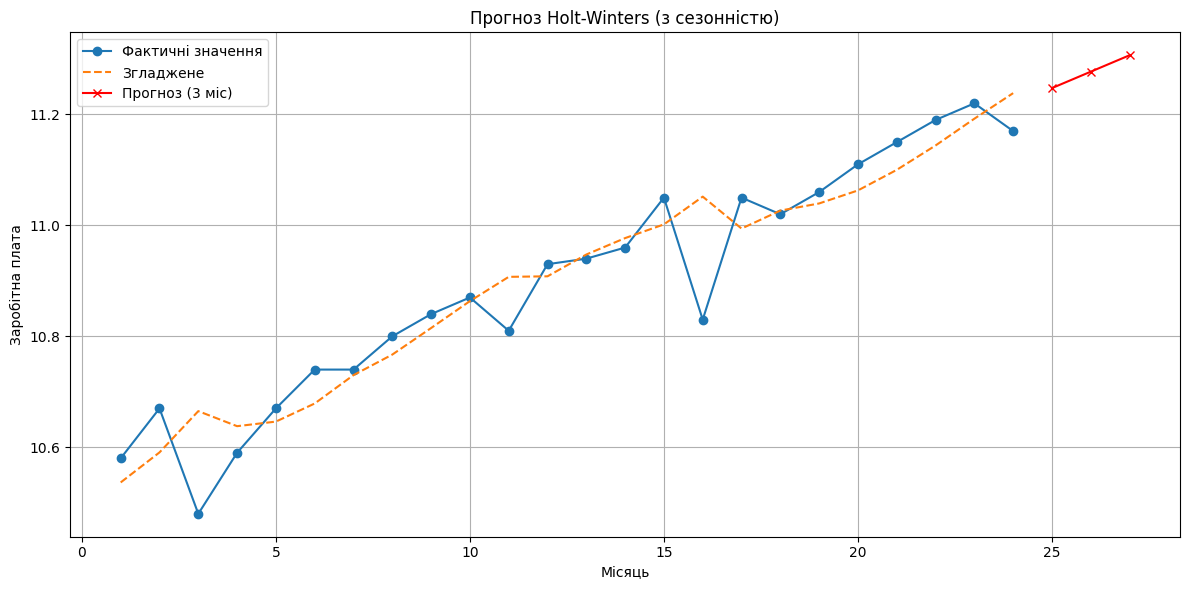

In [58]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Параметри згладжування
alpha = 0.3
beta = 0.4

# Побудова моделі Holt-Winters (additive seasonality, сезон = 12)
model = ExponentialSmoothing(
    df['Earnings'],
    trend='add',
    seasonal=None,   
    seasonal_periods=12
).fit(
    smoothing_level=alpha,
    smoothing_trend=beta, 
    optimized=False
)

# Прогноз на 3 місяці вперед
forecast = model.forecast(3)

# Вивід прогнозів
for i, value in enumerate(forecast, start=25):
    print(f"Прогноз для місяця {i}: {value:.2f}")

# Побудова графіка
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['Earnings'], label='Фактичні значення', marker='o')
plt.plot(range(1, 25), model.fittedvalues, label='Згладжене', linestyle='--')
plt.plot(range(25, 28), forecast, label='Прогноз (3 міс)', marker='x', color='red')
plt.xlabel("Місяць")
plt.ylabel("Заробітна плата")
plt.title("Прогноз Holt-Winters (з сезонністю)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 32

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

years = list(range(1,12))
profit = [8.4, 7.4, 7.4, 7.2, 6.3, 7.9, 7.7, 7.1, 8.5, 7.0, 5.7]

# Створення DataFrame
df = pd.DataFrame({'Years': years,'Profit Margin' : profit})

# Параметри згладжування
A = 0.5
B = 0.4

# Модель Holt-Winters
model = ExponentialSmoothing(
    df['Profit Margin'],
    trend='add',
    seasonal=None,
    seasonal_periods=2
).fit(
    smoothing_level=A,
    smoothing_trend=B,
    optimized=False 
)

# Прогноз на 2 періоди вперед
forecast = model.forecast(2)

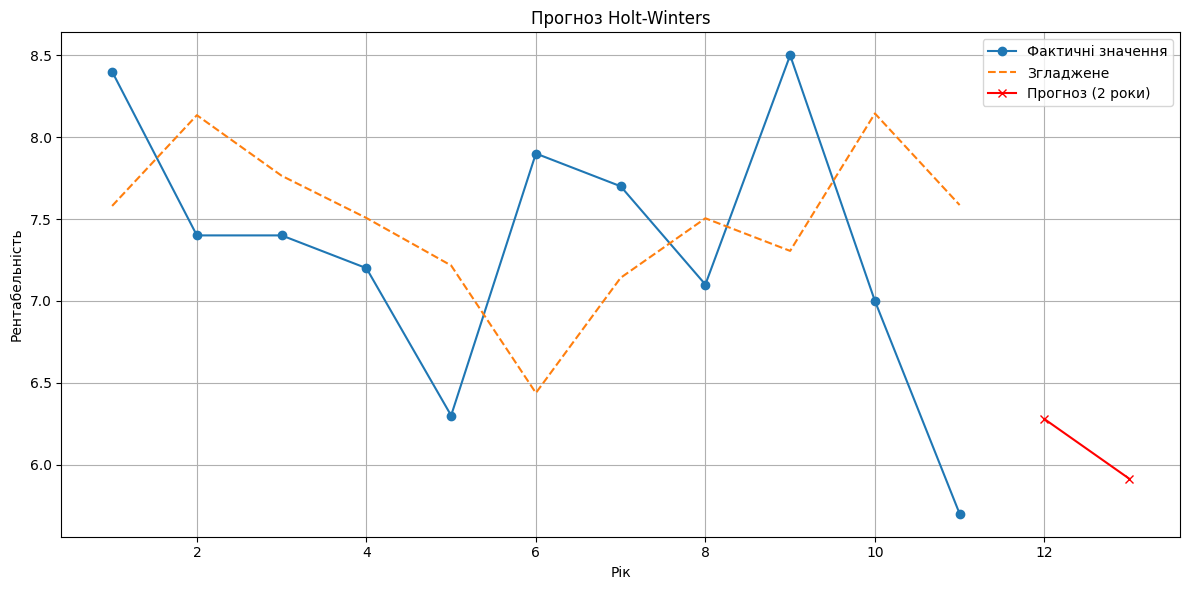

Прогноз для року 12: 6.28
Прогноз для року 13: 5.91


In [60]:
# Побудова графіка
plt.figure(figsize=(12, 6))
plt.plot(df['Years'], df['Profit Margin'], label='Фактичні значення', marker='o')
plt.plot(df['Years'], model.fittedvalues, label='Згладжене', linestyle='--')
plt.plot([12, 13], forecast, label='Прогноз (2 роки)', marker='x', color='red')
plt.xlabel("Рік")
plt.ylabel("Рентабельність")
plt.title("Прогноз Holt-Winters")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Вивід прогнозів
for i, value in enumerate(forecast, start=len(df) + 1):
    print(f"Прогноз для року {i}: {value:.2f}")

### 33

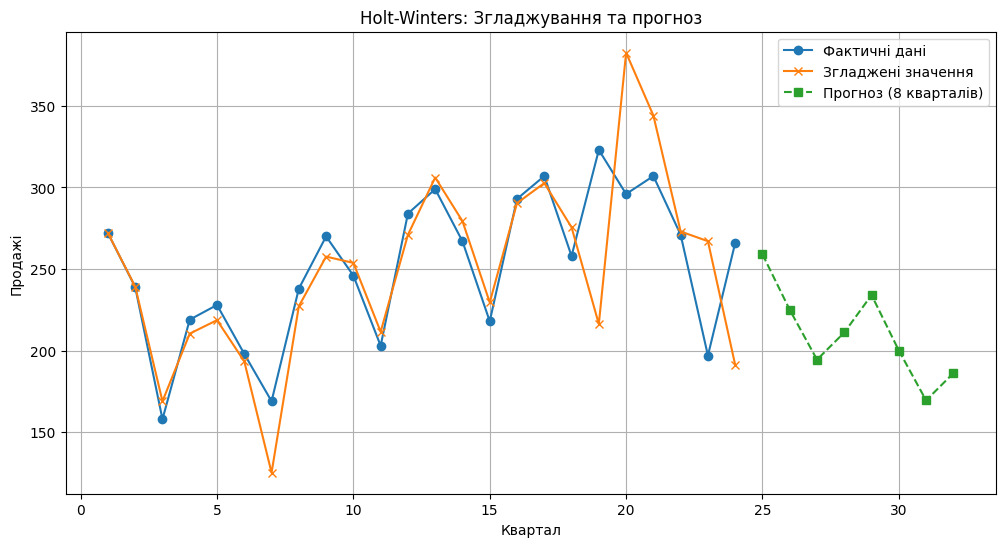

Прогноз на наступні 8 кварталів:
 Quarter  Forecasted Sales
      25        259.022340
      26        225.027212
      27        194.479735
      28        211.152657
      29        234.076184
      30        200.081056
      31        169.533580
      32        186.206502


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Вхідні дані: 6 років по 4 квартали
sales = [
    272, 239, 158, 219,
    228, 198, 169, 238,
    270, 246, 203, 284,
    299, 267, 218, 293,
    307, 258, 323, 296,
    307, 271, 197, 266
]

# Індекс для кварталів
index = list(range(1, len(sales) + 1))
df = pd.DataFrame({'Quarter': index, 'Sales': sales})

# Параметри згладжування
alpha = 0.6
beta = 0.5
gamma = 0.4

# Holt-Winters модель з адитивними компонентами
model = ExponentialSmoothing(
    df['Sales'],
    trend='add',
    seasonal='add',
    seasonal_periods=4
)

# Навчання моделі
fit = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)

# Отримуємо згладжені значення ряду
smoothed = fit.fittedvalues

# Прогноз на 8 кварталів уперед
forecast_steps = 8
forecast = fit.forecast(forecast_steps)
forecast_index = list(range(len(sales) + 1, len(sales) + forecast_steps + 1))

# Побудова графіку
plt.figure(figsize=(12, 6))
plt.plot(df['Quarter'], df['Sales'], label='Фактичні дані', marker='o')
plt.plot(df['Quarter'], smoothed, label='Згладжені значення', linestyle='-', marker='x')
plt.plot(forecast_index, forecast, label='Прогноз (8 кварталів)', linestyle='--', marker='s')
plt.title('Holt-Winters: Згладжування та прогноз')
plt.xlabel('Квартал')
plt.ylabel('Продажі')
plt.legend()
plt.grid(True)
plt.show()

# Таблиця з прогнозом
forecast_df = pd.DataFrame({
    'Quarter': forecast_index,
    'Forecasted Sales': forecast
})

print("Прогноз на наступні 8 кварталів:")
print(forecast_df.to_string(index=False))


### 34

Прогноз для кварталу 25: 366.56
Прогноз для кварталу 26: 259.75
Прогноз для кварталу 27: 307.41
Прогноз для кварталу 28: 290.11
Прогноз для кварталу 29: 375.64
Прогноз для кварталу 30: 268.83
Прогноз для кварталу 31: 316.49
Прогноз для кварталу 32: 299.19


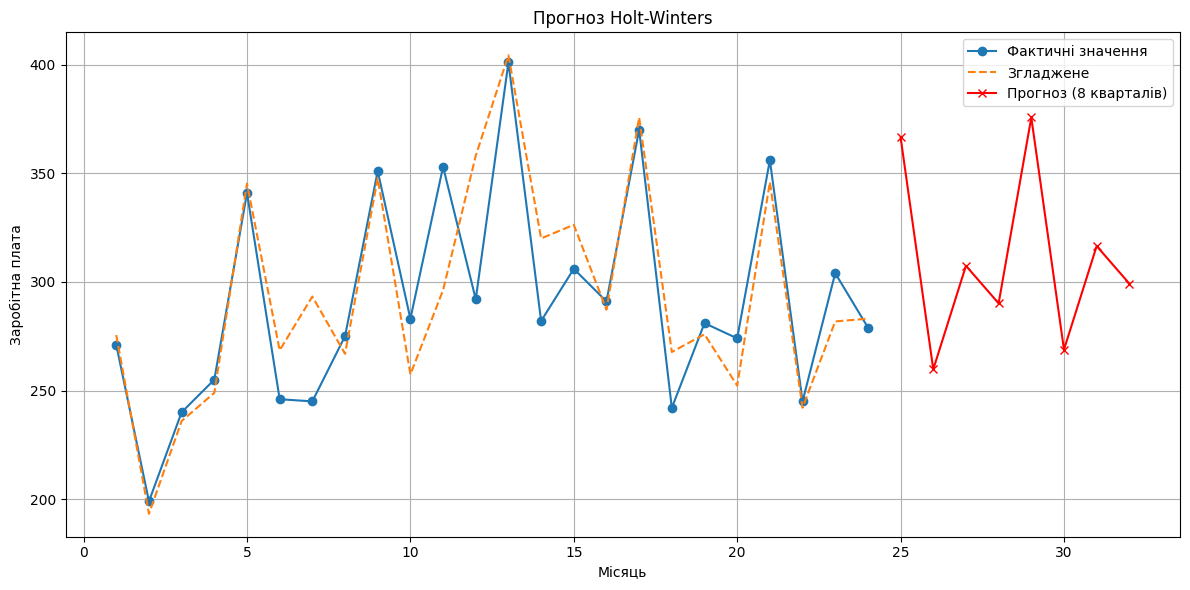

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# дані з таблиці 
data = [
    271, 199, 240, 255, 
    341, 246, 245, 275,  
    351, 283, 353, 292,  
    401, 282, 306, 291,  
    370, 242, 281, 274,  
    356, 245, 304, 279 
]
quarters = list(range(1, 25))
df = pd.DataFrame({'Quarters': quarters, 'Sales': data})

# Параметри згладжування
alpha = 0.5
beta = 0.4
gamma = 0.3 

# Побудова моделі Holt-Winters (additive seasonality, сезон = 12)
model = ExponentialSmoothing(
    df['Sales'],
    trend='add',
    seasonal='add',   
    seasonal_periods=4
).fit(
    smoothing_level=alpha,
    smoothing_trend=beta,
    smoothing_seasonal=gamma,  
)

# Прогноз на 3 місяці вперед
forecast = model.forecast(8)

# Вивід прогнозів
for i, value in enumerate(forecast, start=25):
    print(f"Прогноз для кварталу {i}: {value:.2f}")

# Побудова графіка
plt.figure(figsize=(12, 6))
plt.plot(df['Quarters'], df['Sales'], label='Фактичні значення', marker='o')
plt.plot(range(1, 25), model.fittedvalues, label='Згладжене', linestyle='--')
plt.plot(range(25, 33), forecast, label='Прогноз (8 кварталів)', marker='x', color='red')
plt.xlabel("Місяць")
plt.ylabel("Заробітна плата")
plt.title("Прогноз Holt-Winters")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 17.9 Autoregressive model

Авторегресія — це тип моделі часових рядів, де поточні значення пояснюються за допомогою їхніх власних попередніх значень.

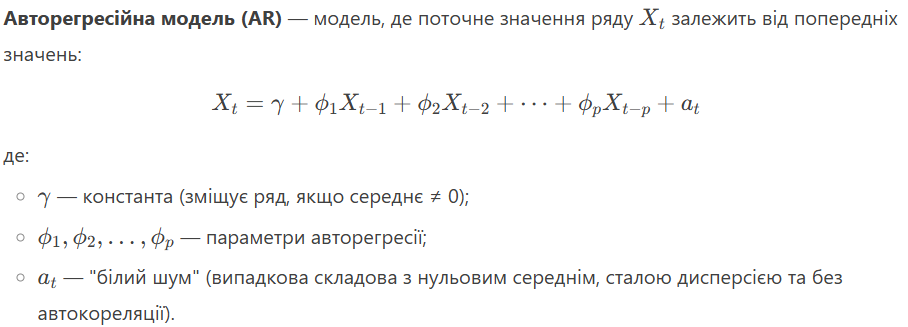

Моделі AR корисні для фіксації постійності, тенденцій і циклів у даних.

Автокореляція — кореляція між значеннями ряду в різні моменти часу.



Типи моделей

AR(1) (першого порядку):

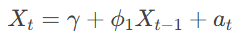

Прогноз залежить лише від останнього спостереження.

AR(2) (другого порядку):

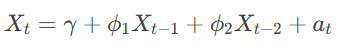

Враховує два попередніх значення.

AR(p) (p-го порядку):

Включає p попередніх значень для прогнозу Xt. 

У моделі авторегресії залишкова сума квадратів (SS) обчислюється від часу \( t = p + 1 \), оскільки \( p \) попередні значення потрібні для прогнозування:

$$
SS = \sum_{t = p + 1}^{n} \left( X_t - \gamma - \phi_1 X_{t-1} - \phi_2 X_{t-2} - \dots - \phi_p X_{t-p} \right)^2
$$

Мінімізація цієї функції допомагає оцінити оптимальні параметри для моделі AR.

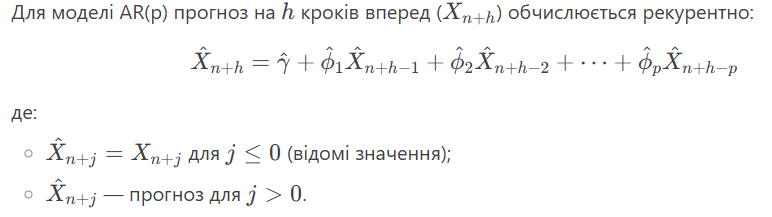

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   29
Model:                     AutoReg(4)   Log Likelihood                -165.832
Method:               Conditional MLE   S.D. of innovations            183.890
Date:                Thu, 08 May 2025   AIC                            343.664
Time:                        19:14:44   BIC                            350.977
Sample:                             4   HQIC                           345.692
                                   29                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        484.9347    212.420      2.283      0.022      68.598     901.271
y.L1           1.0866      0.193      5.630      0.000       0.708       1.465
y.L2          -0.2141      0.285     -0.751      0.4

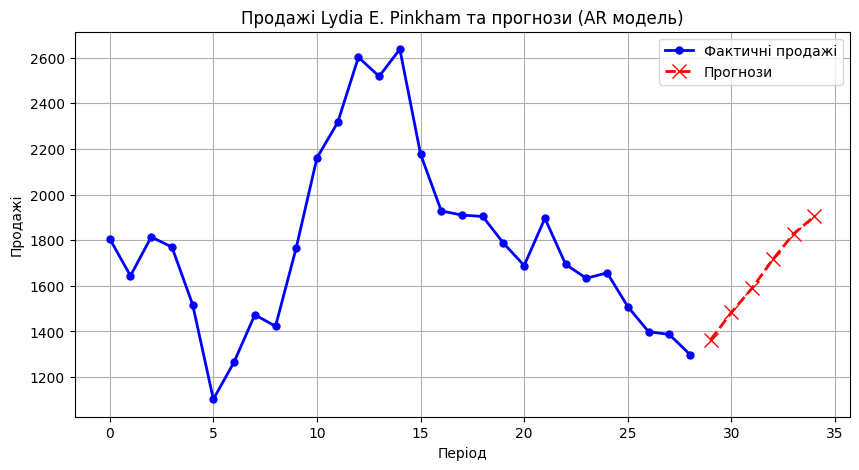

In [ ]:
# Імпорт бібліотек
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Дані продажів Lydia E. Pinkham
data = [
    1806, 1644, 1814, 1770, 1518, 1103, 1266, 1473, 1423, 1767,
    2161, 2316, 2602, 2518, 2637, 2177, 1928, 1910, 1904, 1787,
    1689, 1896, 1694, 1633, 1657, 1509, 1399, 1387, 1299
]

# Створення та навчання AR моделі (наприклад, AR(4))
model = AutoReg(data, lags=4)  
results = model.fit()

# Виведення звіту про модель
print(results.summary())

# Прогнозування на 6 періодів вперед
forecast = results.forecast(steps=6)
print("\nПрогнозовані значення:", forecast)

# Візуалізація даних та прогнозів
plt.figure(figsize=(10, 5))

# Фактичні дані
t_data = list(range(len(data)))
plt.plot(t_data, data, 'bo-', label='Фактичні продажі', markersize=5, linewidth=2)

# Прогнози
t_forecast = list(range(len(data), len(data) + 6))
plt.plot(t_forecast, forecast, 'rx--', label='Прогнози', markersize=10, linewidth=2)

# Налаштування графіка
plt.title("Продажі Lydia E. Pinkham та прогнози (AR модель)")
plt.xlabel("Період")
plt.ylabel("Продажі")
plt.legend()
plt.grid(True)
plt.show()

# 17.10 Autoregressive integrated moving average models 

ARIMA-модель

Структура:

* AR (Авторегресія): Використовує попередні значення часового ряду.

Наприклад: AR(2) → залежність від двох останніх спостережень.

* I (Інтегрована частина): Диференціювання для досягнення стаціонарності.

Наприклад: d=1 → перша різниця.

* MA (Ковзне середнє): Враховує помилки попередніх прогнозів.

Наприклад: MA(1) → залежність від однієї попередньої помилки.

Порядок моделі: ARIMA(p, d, q), де:

p — порядок AR, d — ступінь диференціювання, q — порядок MA.

In [36]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data, order=(2,1,1))  # ARIMA(2,1,1)
model_fit = model.fit()
print(model_fit.summary())

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   29
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -188.264
Date:                Thu, 08 May 2025   AIC                            384.528
Time:                        19:24:28   BIC                            389.857
Sample:                             0   HQIC                           386.157
                                 - 29                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4123      3.936      0.105      0.917      -7.301       8.126
ar.L2          0.0106      0.900      0.012      0.991      -1.754       1.775
ma.L1         -0.2153      3.993     -0.054      0.9

Метод  Бокса-Дженкінса

3 етапи:

* Ідентифікація моделі:

Перевірка стаціонарності (тест Дікі-Фуллера).

Побудова ACF/PACF графіків для вибору p та q.

In [ ]:
# Код:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

* Оцінка параметрів:

Використання методів (наприклад, МНК) для оцінки коефіцієнтів AR та MA.

Код: model.fit() — навчання моделі.

* Діагностика моделі:

Аналіз залишків: вони повинні бути "білим шумом".

Перевірка на автокореляцію (тест Ljung-Box).

Переваги:

Гнучкість: можливість моделювати складні залежності.

Точність: добре показує себе в економічних та бізнес-даних.

Недоліки:

Складність вибору порядку (p, d, q).

Чутливість до помилок у попередніх етапах (напр., нестаціонарний ряд).

ARIMA та метод Бокса-Дженкінса — потужний інструмент, але вимагає ретельного аналізу даних, корекції помилок у коді та інтерпретації результатів. Практичне застосування включає ітераційний підхід: від вибору моделі до перевірки її адекватності.